In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from ydata_profiling import ProfileReport




In [2]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [3]:
pd.set_option('display.max_columns', None) #열 보여주는 개수 제한 해제
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_columns',20 ) #열 보여주는 개수 20 개 제한 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_rows', None) #행 보여주는 개수 제한 해제
print(df.isnull().sum()/len(df)) #결측치 확인
pd.set_option('display.max_rows', 60) #행 보여주는 개수 60 개 제한 

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

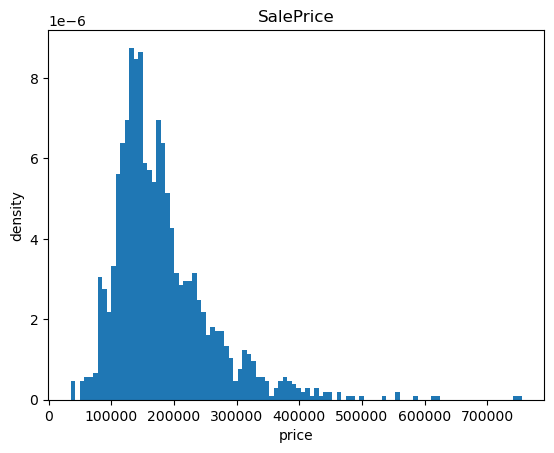

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
plt.hist(df['SalePrice'], bins=100, density=True)
plt.title('SalePrice')
plt.xlabel('price')
plt.ylabel('density')
plt.show()

df['SalePrice'].describe()

In [8]:
df = df.drop('Id', axis=1) #ID는 필요없는 데이터

In [9]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_notebook_iframe()

In [10]:
'''
for column in df.columns:
    plt.figure(figsize=(10, 6))
    
    if df[column].dtype in [np.int64, np.float64]:
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}', fontsize=15)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

    else:
        sns.countplot(x=df[column], order = df[column].value_counts().index)
        plt.title(f'Count of {column}', fontsize=15)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
    plt.show()
'''

"\nfor column in df.columns:\n    plt.figure(figsize=(10, 6))\n    \n    if df[column].dtype in [np.int64, np.float64]:\n        sns.histplot(df[column], kde=True)\n        plt.title(f'Distribution of {column}', fontsize=15)\n        plt.xlabel(column, fontsize=12)\n        plt.ylabel('Frequency', fontsize=12)\n\n    else:\n        sns.countplot(x=df[column], order = df[column].value_counts().index)\n        plt.title(f'Count of {column}', fontsize=15)\n        plt.xlabel(column, fontsize=12)\n        plt.ylabel('Count', fontsize=12)\n        plt.xticks(rotation=45, ha='right')\n    plt.show()\n"

In [11]:
#train 준비
#다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

n_df = df.select_dtypes(include=['int64', 'float64'])
n_df = n_df.drop('SalePrice', axis=1)
n_df = n_df.fillna(n_df.median())

vif = pd.DataFrame()
vif["feature"] = n_df.columns

vif["VIF"] = [variance_inflation_factor(n_df.values, i) for i in range(len(n_df.columns))]

print(vif.sort_values(by='VIF', ascending=False))

          feature           VIF
9      BsmtFinSF2           inf
8      BsmtFinSF1           inf
15      GrLivArea           inf
14   LowQualFinSF           inf
13       2ndFlrSF           inf
12       1stFlrSF           inf
11    TotalBsmtSF           inf
10      BsmtUnfSF           inf
35         YrSold  2.404984e+04
24    GarageYrBlt  2.251703e+04
6    YearRemodAdd  2.241501e+04
5       YearBuilt  2.128391e+04
22   TotRmsAbvGrd  8.344719e+01
3     OverallQual  6.659442e+01
4     OverallCond  4.167002e+01
21   KitchenAbvGr  3.752022e+01
25     GarageCars  3.680061e+01
26     GarageArea  3.218701e+01
20   BedroomAbvGr  3.108438e+01
18       FullBath  2.667944e+01
1     LotFrontage  1.733722e+01
34         MoSold  6.644594e+00
0      MSSubClass  4.648665e+00
16   BsmtFullBath  3.694839e+00
19       HalfBath  3.419317e+00
23     Fireplaces  3.018918e+00
2         LotArea  2.646056e+00
27     WoodDeckSF  1.905146e+00
7      MasVnrArea  1.841908e+00
28    OpenPorchSF  1.825919e+00
29  Encl

C:\Users\Coco\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [12]:
n_df = df.select_dtypes(include=['int64', 'float64'])
Y = n_df['SalePrice']
n_df = n_df.drop('SalePrice', axis=1)

n_df['BuiltAge'] = n_df['YrSold'] - n_df['YearBuilt']
n_df['RemodAge'] = n_df['YrSold'] - n_df['YearRemodAdd']

n_df['GarageYrBlt'] = n_df['GarageYrBlt'].fillna(n_df['YearBuilt'])
n_df['GarageAge'] = n_df['YrSold'] - n_df['GarageYrBlt']
                      
n_df = n_df.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageArea', 'TotRmsAbvGrd','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])
n_df = n_df.fillna(n_df.median())

n_df['TotalBath'] = (n_df['FullBath'] + n_df['BsmtFullBath'] +n_df['HalfBath'] + n_df['BsmtHalfBath'])
n_df['TotalPorchSF'] = (n_df['OpenPorchSF'] + n_df['EnclosedPorch'] +n_df['3SsnPorch'] + n_df['ScreenPorch'])

n_df = n_df.drop(columns = ['FullBath','BsmtFullBath','HalfBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

vif = pd.DataFrame()
vif["feature"] = n_df.columns
vif["VIF"] = [variance_inflation_factor(n_df.values,i) for i in range(len(n_df.columns))]

print(vif.sort_values(by='VIF', ascending=False))

         feature        VIF
3    OverallQual  47.832423
7      GrLivArea  35.483538
4    OverallCond  29.766016
9   KitchenAbvGr  26.315070
8   BedroomAbvGr  21.936435
19     TotalBath  17.896505
1    LotFrontage  16.309839
11    GarageCars  14.408480
16      BuiltAge  13.260273
6    TotalBsmtSF  12.934689
18     GarageAge  10.727894
15        MoSold   6.435207
17      RemodAge   4.321130
0     MSSubClass   4.271364
10    Fireplaces   2.808280
2        LotArea   2.606517
20  TotalPorchSF   2.053731
12    WoodDeckSF   1.874314
5     MasVnrArea   1.764291
13      PoolArea   1.083403
14       MiscVal   1.023129


In [13]:
#범주형 데이터를 이산형 데이터로 변환
dfg = df.select_dtypes(include=['object'])
#품질 변환하기
QualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
QualDict2 = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Rating ={'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0.5,'NA':0}
Expo = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
GFin = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
FcQ = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

#변환할 열 
Qualcols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
Qualcols2 = ['BsmtFinType1','BsmtFinType2']

dfg['GarageType'] = dfg['GarageType'].fillna('NA')
dfg['MiscFeature'] = dfg['MiscFeature'].fillna('NA')
dfg['Alley'] = dfg['Alley'].fillna('NA')
dfg['MasVnrType'] = dfg['MasVnrType'].fillna('NA')

for col in Qualcols:
    dfg[col] = dfg[col].fillna('NA')
    dfg[col] = dfg[col].map(QualDict)

for col in Qualcols2:
    dfg[col] = dfg[col].fillna('NA')
    dfg[col] = dfg[col].map(Rating)

dfg['PoolQC'] = dfg['PoolQC'].fillna('NA')
dfg['PoolQC'] = dfg['PoolQC'].map(QualDict2)

dfg['BsmtExposure'] = dfg['BsmtExposure'].fillna('NA')
dfg['BsmtExposure'] = dfg['BsmtExposure'].map(Expo)

dfg['GarageFinish'] = dfg['GarageFinish'].fillna('NA')
dfg['GarageFinish'] = dfg['GarageFinish'].map(GFin)

dfg['Fence'] = dfg['Fence'].fillna('NA')
dfg['Fence'] = dfg['Fence'].map(FcQ)

dfg = dfg.drop(columns = ['Electrical'])



In [14]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import mean_squared_error

In [15]:
train_df = pd.concat([n_df,dfg],axis=1 )
train_df = pd.get_dummies(train_df) # 원 핫 인코딩


X = train_df

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor

#Random Forests
model=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_Y, prediction7))
print('The RMSE of the Random Forest is', rmse)


The RMSE of the Random Forest is 27342.574558203167


In [17]:
#Support Vector Regression 모델
model = svm.SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('RMSE for rbf SVR is ', np.sqrt(mean_squared_error(prediction1, test_Y)))
print('RMSE for rbf SVR is ', np.sqrt(mean_squared_error(prediction1, test_Y))/Y.mean())

RMSE for rbf SVR is  84872.43013043373
RMSE for rbf SVR is  0.46911269689950175


In [18]:
#K-Nearest Neighbours(KNN)

model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.00684931506849315


In [19]:
# Gaussian Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.0045662100456621


In [20]:
test_file_path = "house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)

ids = test_data['Id']
test_data_processed = test_data.drop('Id', axis=1)
test_data_processed = pd.get_dummies(test_data_processed)
final_test_data = test_data_processed.reindex(columns=train_X.columns, fill_value=0)
final_test_data = final_test_data.fillna(train_X.median())
preds = model.predict(final_test_data)
output = pd.DataFrame({'Id': ids,'SalePrice': preds})
output.head()

,Id,SalePrice
0,1461,147000
1,1462,190000
2,1463,147000
3,1464,147000
4,1465,147000
